# LAB 3 Evgenii Safronov

In [2]:
from matplotlib import pyplot as plt
import scipy as scp
import numpy as np

In [3]:
A = np.loadtxt("omni2_19422.lst")

In [4]:
year, day, hour, Bz, speed, pressure, DST = A.T

In [5]:
time = year*365*24 + day*24 + hour

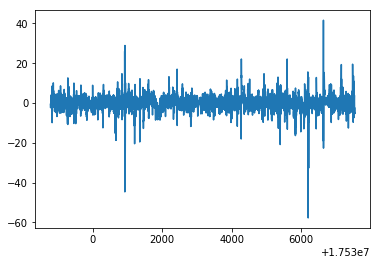

In [6]:
plt.plot(time,Bz);

no missing values

# Missing values hello

9999.0

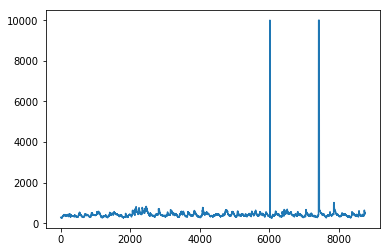

In [7]:
plt.plot(speed)
max(speed) #missing values

In [8]:
for i in range(speed.shape[0]):
    if speed[i] > 9000:
        print(i, end='\t')

6018	7418	7419	7420	7421	7422	7423	7424	7425	7426	7427	7428	7429	7430	7431	7432	7433	7434	7435	7436	

one single missing value and many in a row

In [9]:
speed[6018] = (speed[6017] + speed[6019])/2

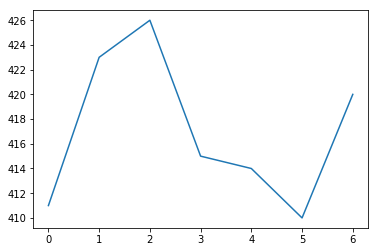

In [10]:
plt.plot(speed[7410:7417]);

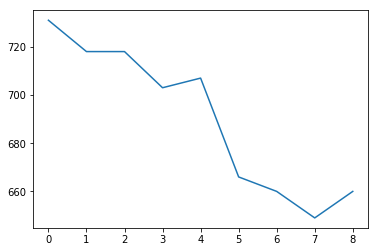

In [11]:
plt.plot(speed[7437:7446]);

ok, let's fit them linearly...

In [12]:
for i in range(7418, 7437):
    speed[i] = (speed[7437] - speed[7417])/(7437 - 7417)*(i-7417) + speed[7417]

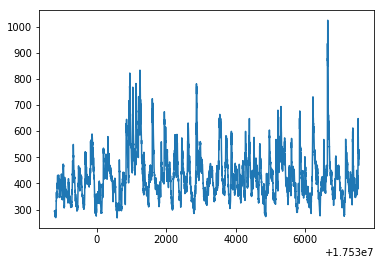

In [13]:
plt.plot(time, speed);

99.99

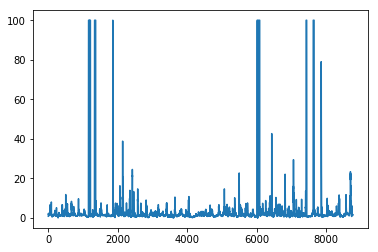

In [14]:
plt.plot(pressure)
max(pressure) #missing values

In [15]:
for i in range(pressure.shape[0]):
    if pressure[i] > 90:
        print(i, end='\t')

1156	1157	1158	1159	1160	1161	1162	1163	1164	1165	1166	1167	1168	1169	1170	1171	1172	1173	1174	1175	1176	1177	1178	1179	1180	1181	1182	1183	1184	1185	1193	1194	1195	1196	1197	1198	1199	1200	1201	1202	1203	1204	1205	1206	1207	1208	1209	1210	1211	1212	1329	1330	1331	1332	1333	1334	1335	1336	1337	1338	1339	1340	1341	1342	1343	1344	1345	1346	1347	1348	1349	1350	1351	1352	1353	1354	1355	1356	1357	1358	1359	1360	1361	1362	1363	1856	6008	6009	6010	6011	6012	6013	6014	6015	6016	6017	6018	6039	6040	6041	6042	6043	6044	6045	6046	6047	6048	6049	6050	6051	6052	6053	6054	6055	6056	6057	6058	6059	6060	6061	6062	6063	6064	6065	6066	6067	6068	6069	6070	6071	6072	6073	6074	6075	6076	6077	6078	6079	6080	6081	6082	6083	6084	7418	7419	7420	7421	7422	7423	7424	7425	7426	7427	7428	7429	7430	7431	7432	7433	7434	7435	7436	7622	7623	7624	7625	7626	7627	7628	7629	7630	7631	7632	7633	7634	7635	7636	7637	7638	7639	7640	7641	7642	7643	7644	7645	7646	7647	7648	7649	

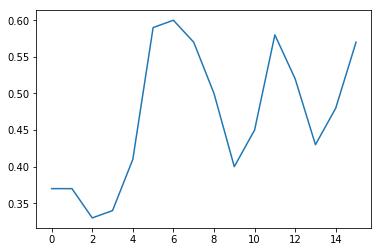

In [16]:
plt.plot(pressure[1140:1156]);

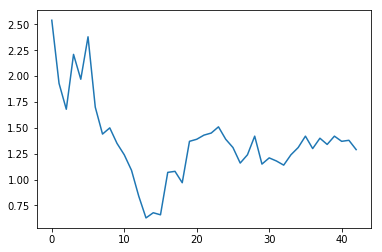

In [17]:
plt.plot(pressure[1213:1256]);

...again linear

In [18]:
missing_intervals = [(1155,1213), (1328, 1364), (6007, 6019), (6038, 6085), (7417,7650)] #1856
for mi in missing_intervals:
    for i in range(*mi):
        pressure[i] = (pressure[mi[1]] - pressure[mi[0]])/(mi[1] - mi[0])*(i-mi[0]) + pressure[mi[0]]

In [19]:
pressure[1856] = (pressure[1855] + pressure[1857])/2

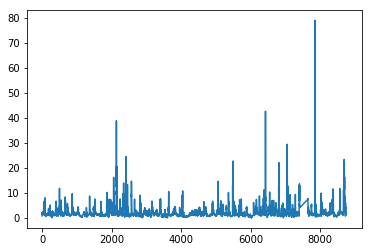

In [20]:
plt.plot(pressure);

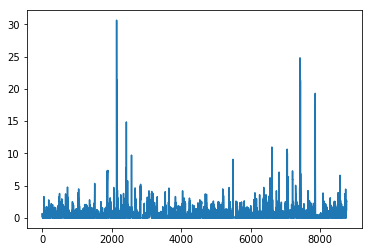

In [21]:
VBs = np.abs(speed*Bz)/1000 * (Bz < 0)
plt.plot(VBs);

# Three models

In [35]:
Pdyn = 0.88
Dst = -6
def dst(τ, b, c, Q):
    dst_res = np.zeros_like(VBs)
    dst_res[0] = Dst - b*Pdyn**0.5 + c
    for i,dst in enumerate(dst_res[:-1]):
        dst_res[i+1] = dst + Q[i] - dst/τ[i]
    return dst_res

## AK1

In [36]:
τ = 17*np.ones_like(VBs)
b = 8.14
c = 11.5
Q = -2.47 * VBs
dst_ak1 = dst(τ, b, c, Q)
error_AK1 = np.sqrt(np.sum((DST-dst_ak1)**2/DST.shape))

## UCB

In [37]:
b = 15.8
c = 20
Q = -4.32*(VBs - 0.5)*(Pdyn**(1/3)) * (VBs > 0.5)
τ = (VBs <= 4)*7.7 + (VBs > 4)*3
dst_UCB = dst(τ, b, c, Q)
error_UCB = np.sqrt(np.sum((DST-dst_UCB)**2/DST.shape))

## AK2

In [38]:
b = 7.26
c = 11
Q = -4.4*(VBs - 0.5)
τ = 2.4*np.exp(9.74/(4.69 + VBs))
dst_ak2 = dst(τ, b, c, Q)
error_AK2 = np.sqrt(np.sum((DST-dst_ak2)**2/DST.shape))

In [39]:
time_doy = (time-time[0])/24

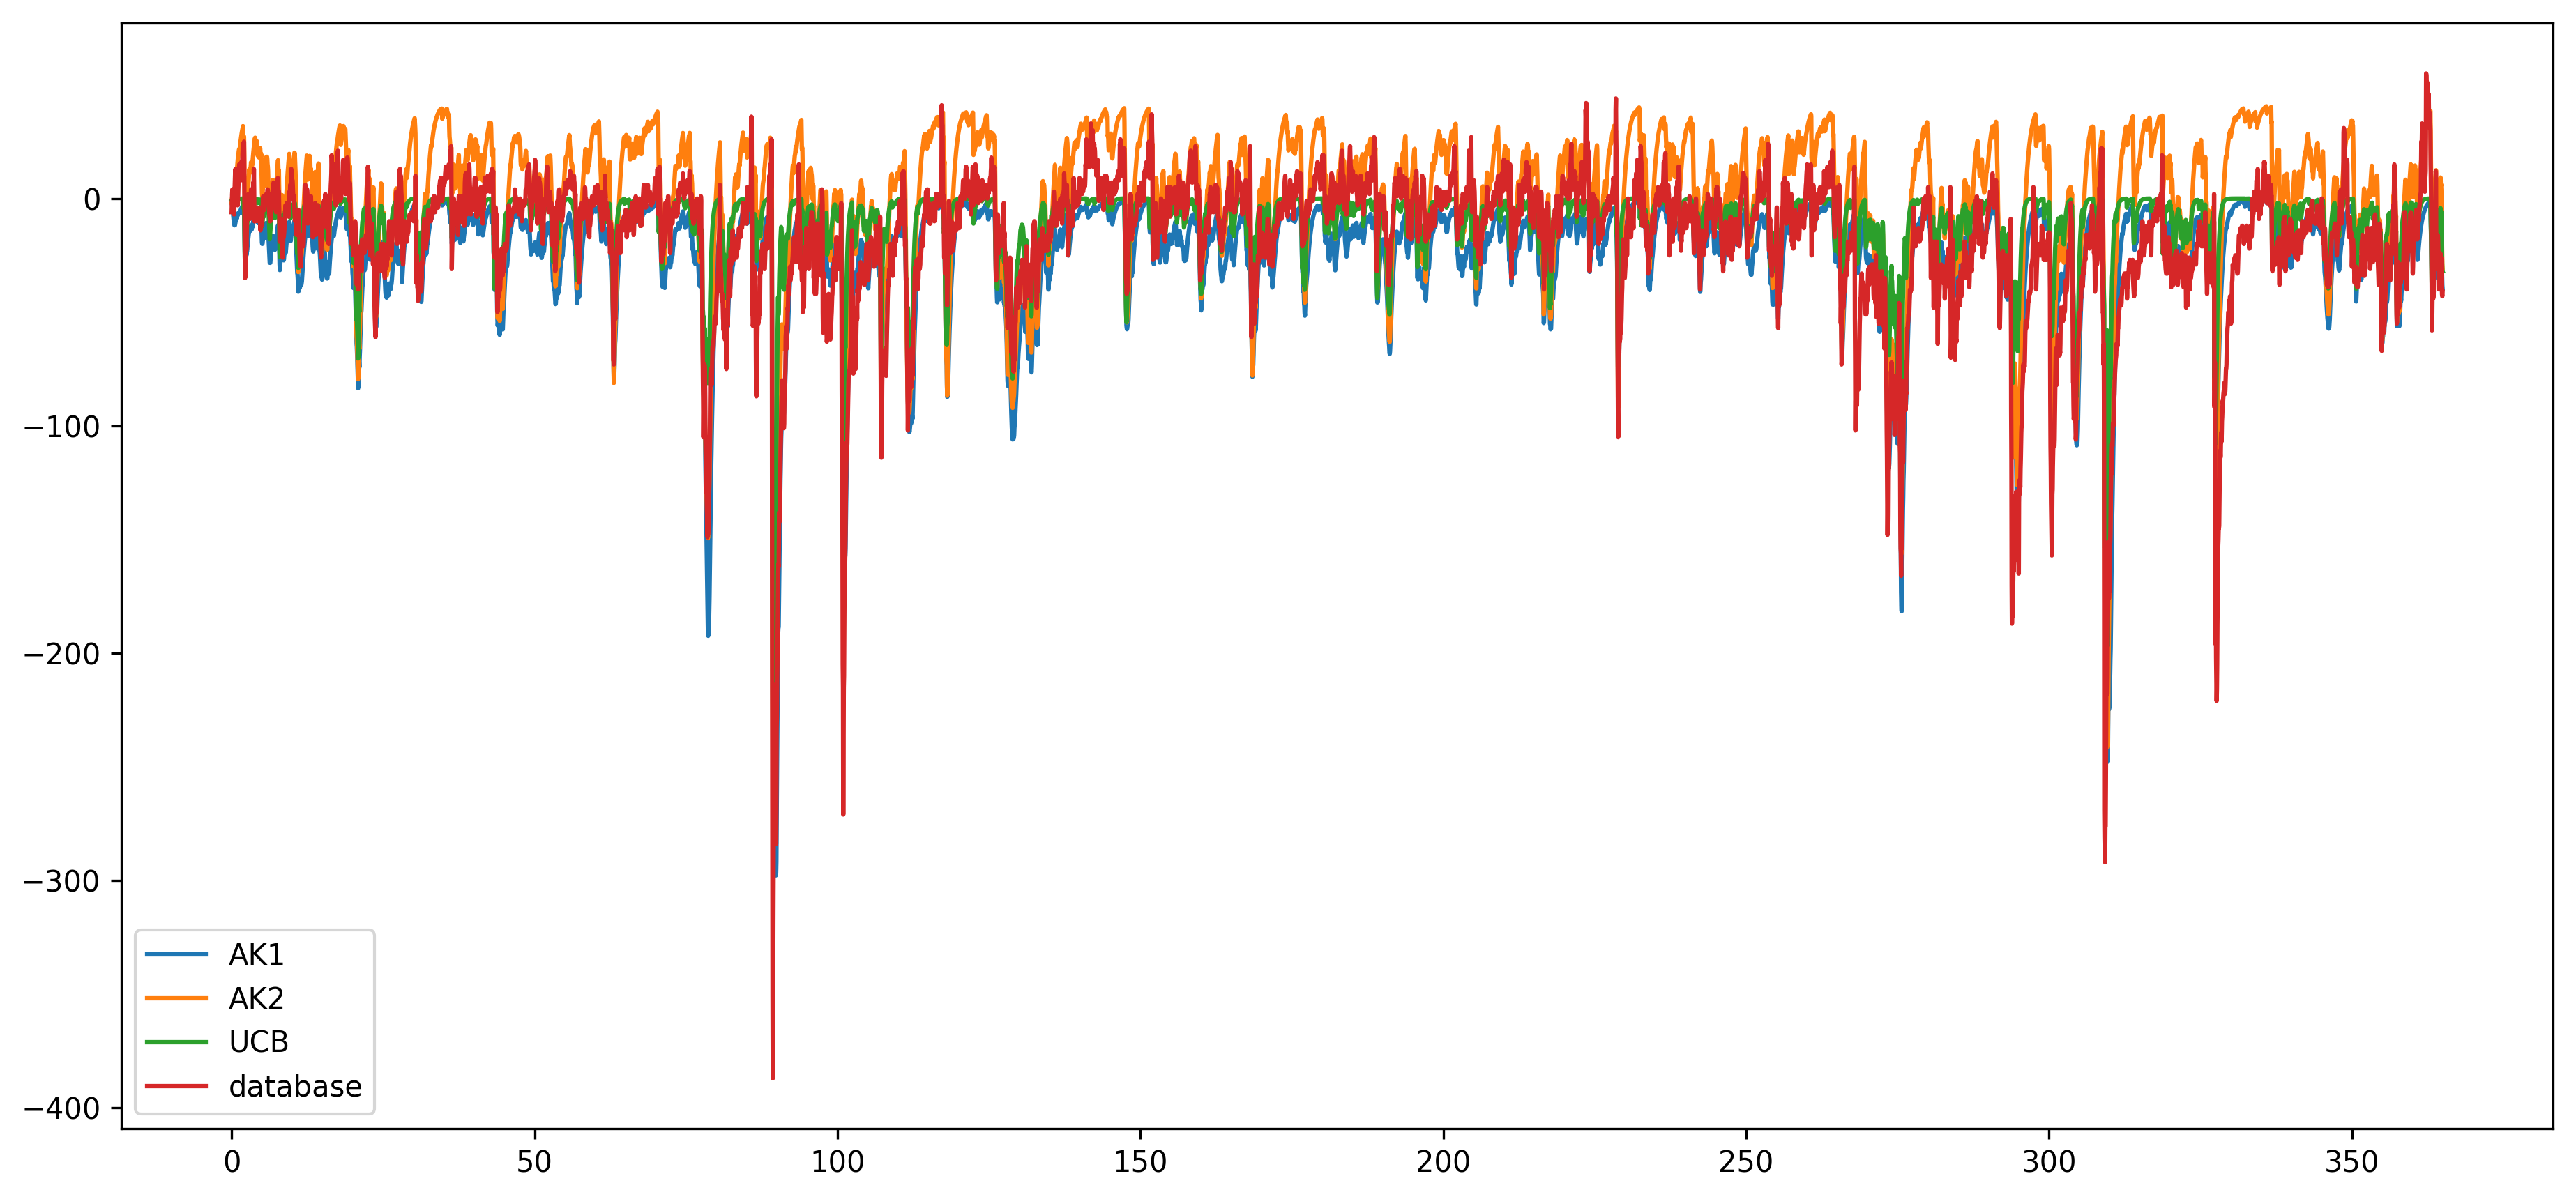

In [40]:
fig, ax = plt.subplots(1, figsize=(15,7), dpi=300)
ax.plot(time_doy, dst_ak1, label="AK1")
ax.plot(time_doy, dst_ak2, label="AK2")
ax.plot(time_doy, dst_UCB, label="UCB")
ax.plot(time_doy, DST, label="database");
ax.legend();

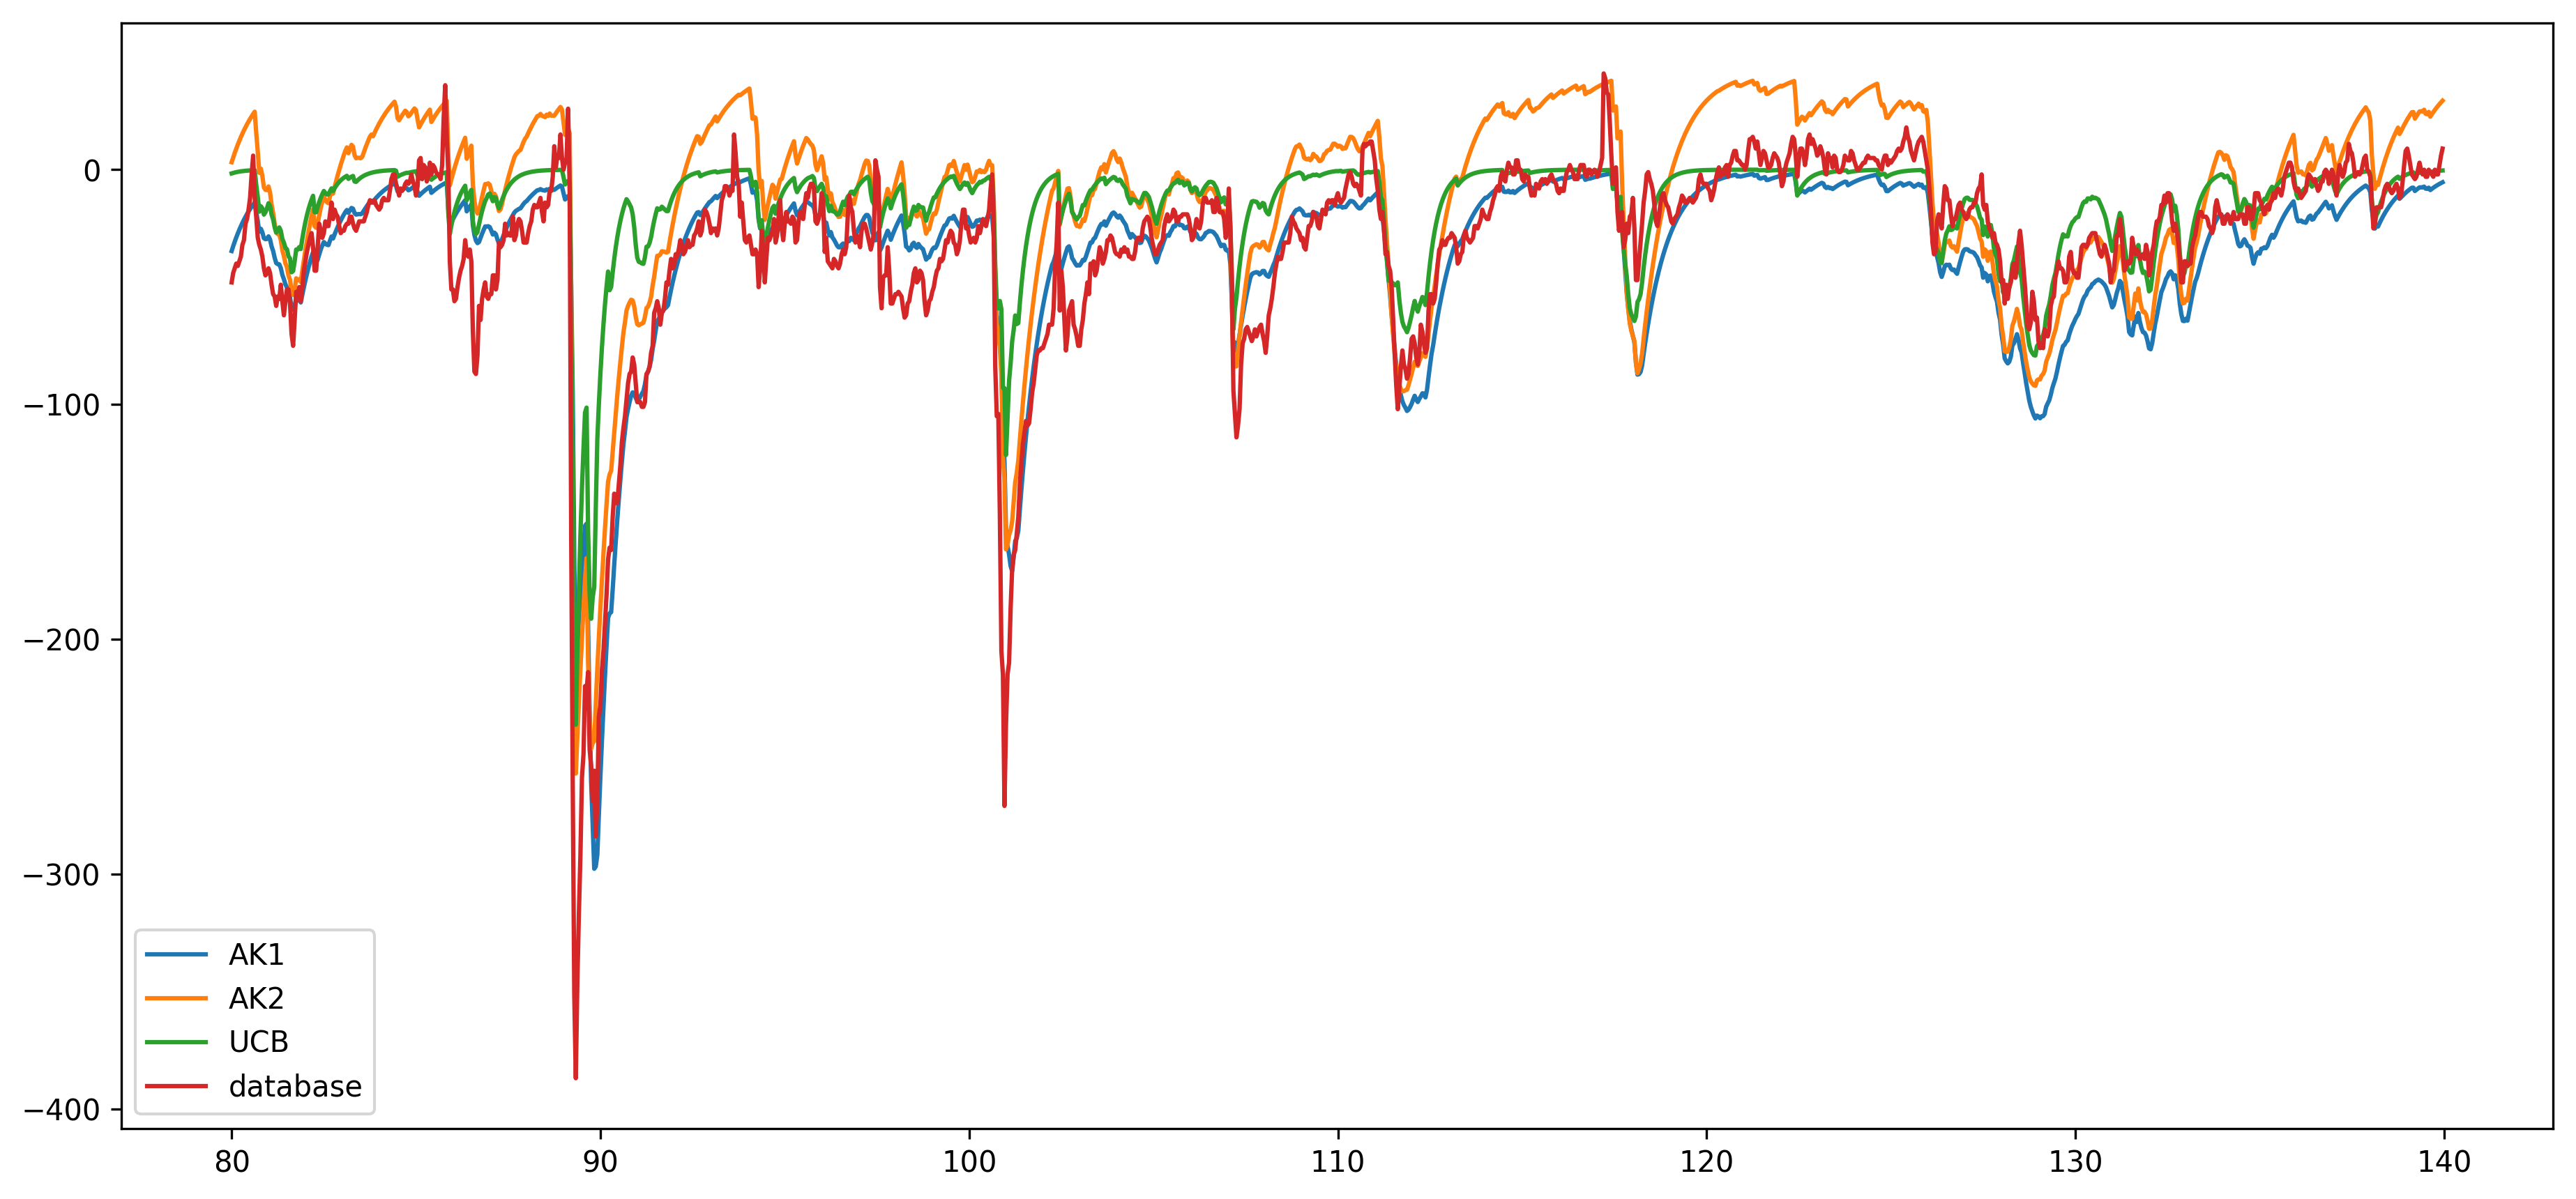

In [41]:
cut = range(np.abs(time_doy - 80).argmin(),np.abs(time_doy - 140).argmin())
fig, ax = plt.subplots(1, figsize=(15,7), dpi=300)
ax.plot(time_doy[cut], dst_ak1[cut], label="AK1")
ax.plot(time_doy[cut], dst_ak2[cut], label="AK2")
ax.plot(time_doy[cut], dst_UCB[cut], label="UCB")
ax.plot(time_doy[cut], DST[cut], label="database")
ax.legend();

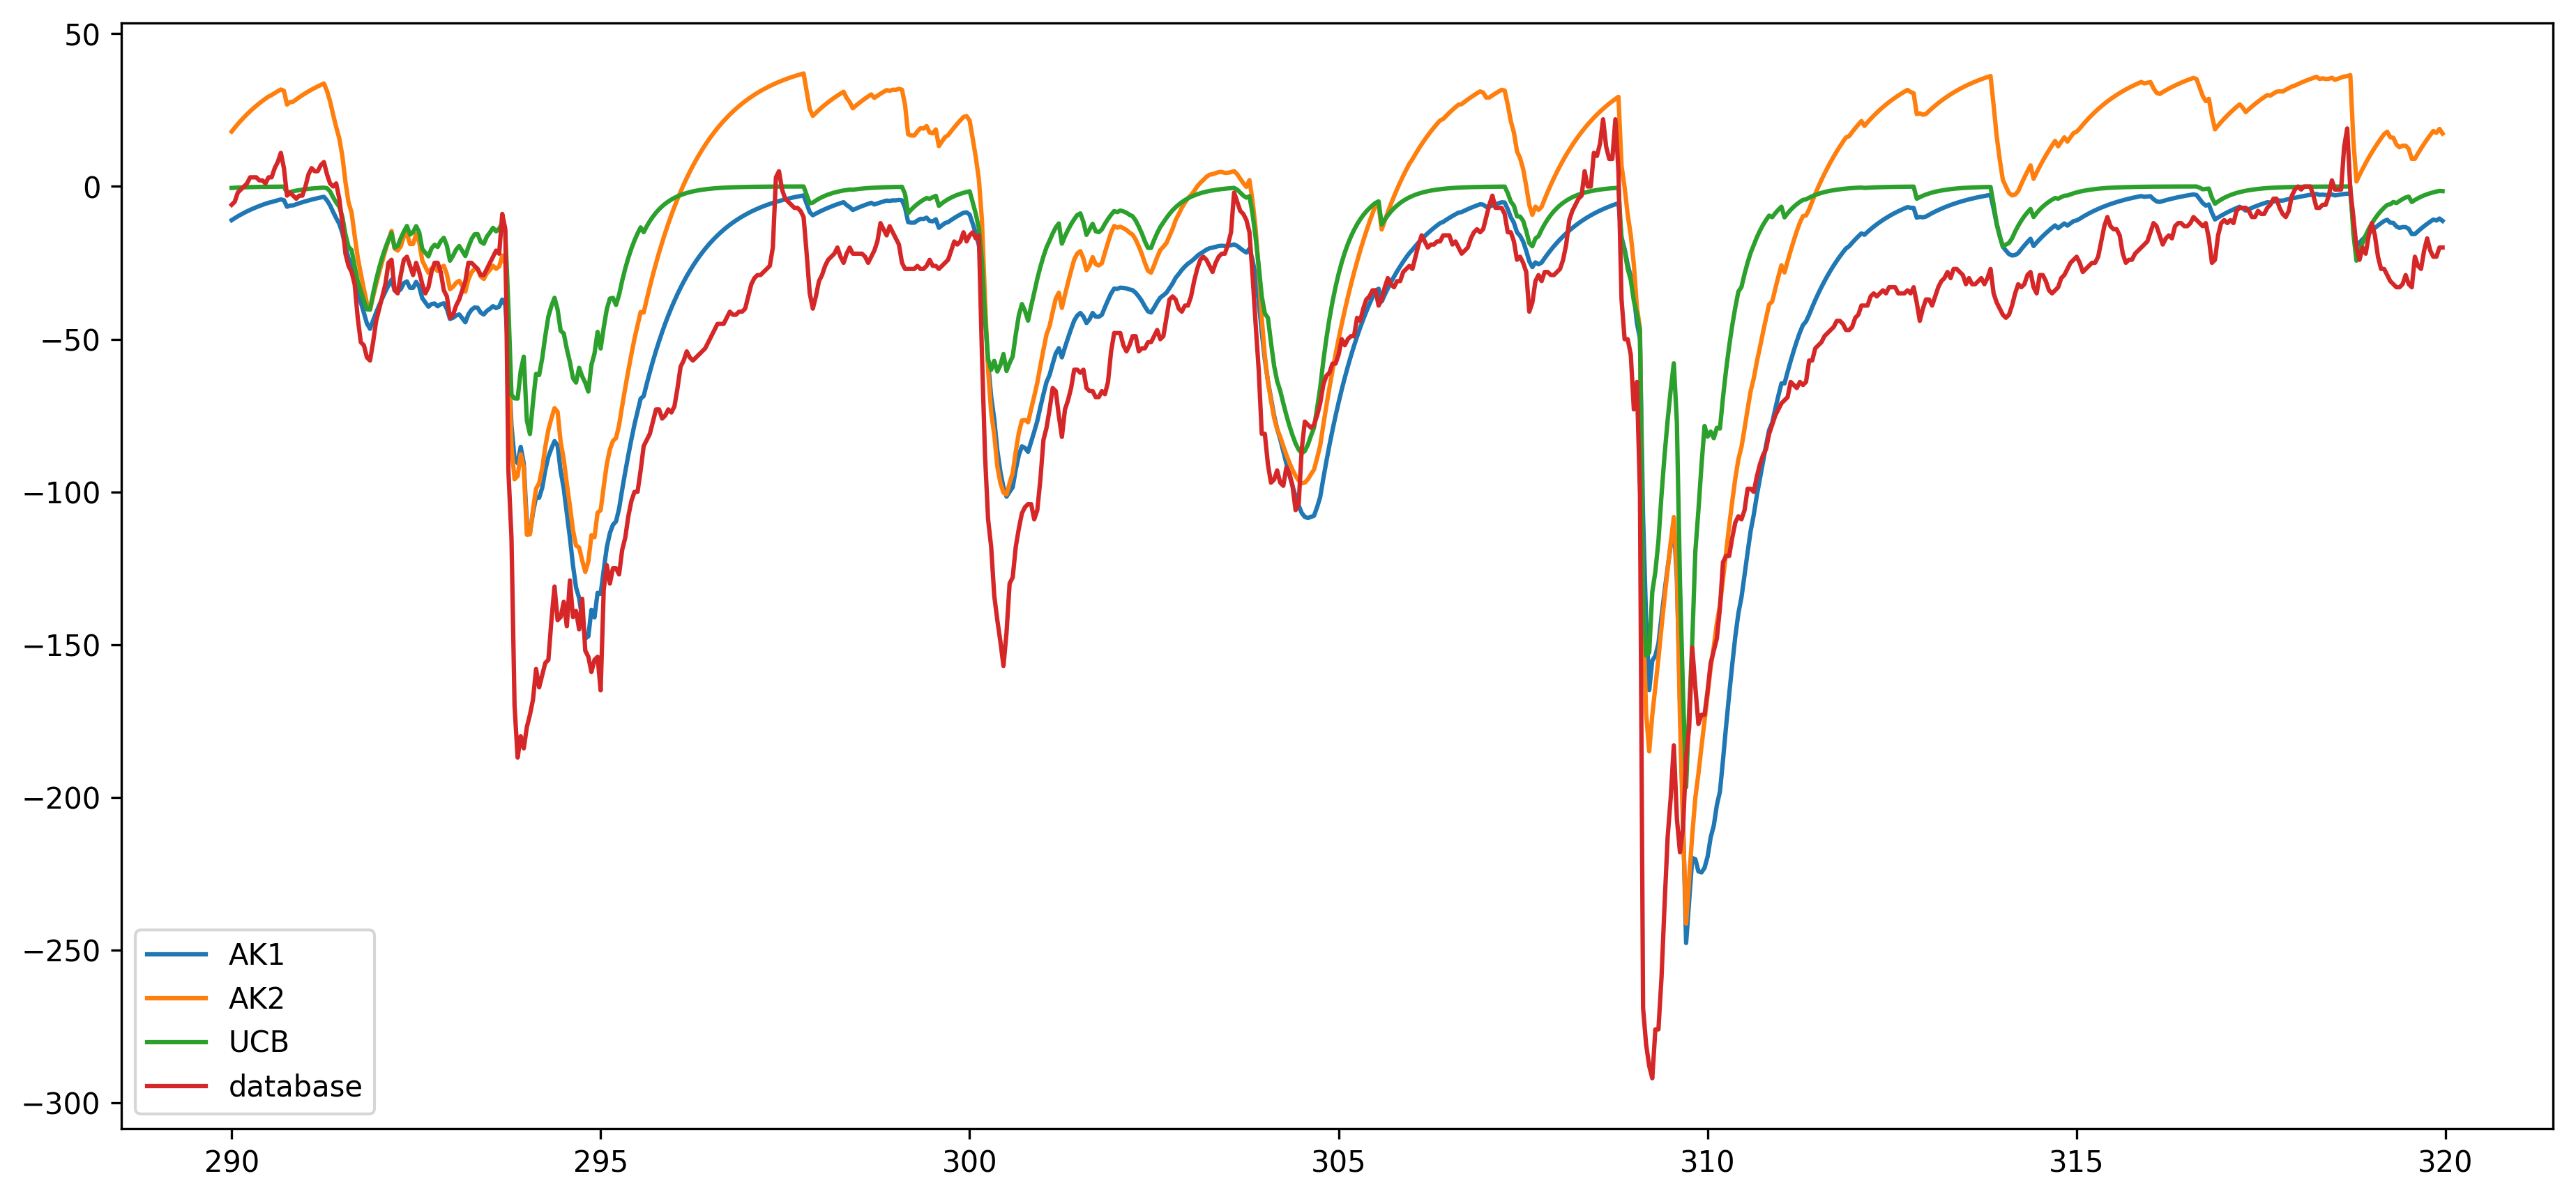

In [42]:
cut = range(np.abs(time_doy - 290).argmin(),np.abs(time_doy - 320).argmin())
fig, ax = plt.subplots(1, figsize=(15,7), dpi=300)
ax.plot(time_doy[cut], dst_ak1[cut], label="AK1")
ax.plot(time_doy[cut], dst_ak2[cut], label="AK2")
ax.plot(time_doy[cut], dst_UCB[cut], label="UCB")
ax.plot(time_doy[cut], DST[cut], label="database")
ax.legend();

In [43]:
print(error_AK1)
print(error_AK2)
print(error_UCB)

18.953170326711103
26.40882384165375
23.17843501332319
